In [22]:
#my client credentials for Spotify API (NELLE'S!!!)
Client_ID = "4555887f29754e4188258d4719c0221c"
Client_Secret = "4e400da7e73a4e9eaa442da8c06922af"

In [23]:
#import needed packages
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

#intialize the Spotify webscraper and input into "spotipy"
client_credentials_manager = SpotifyClientCredentials(client_id=Client_ID, client_secret=Client_Secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [24]:
KNN_df = pd.read_csv('songs_artists.csv')
KNN_df = KNN_df[KNN_df.track_id.notna()]
len(KNN_df)

9980

In [36]:
len(liveliness)

9821

In [41]:
#batch request audio features for each track
danceability = []
energy = []
loudness = []
speechiness = []
acousticness = []
liveliness = []
valence = []
tempo = []

for i in range(0,9900,100):
    #take a batch of size 100 to request
    itter_list = KNN_df.track_id[i:i+100]
    audio_list = sp.audio_features(itter_list)
    time.sleep(1)
    #append audio features
    for dict in audio_list:
        try:
            danceability.append(dict['danceability'])
            energy.append(dict['energy'])
            loudness.append(dict['loudness'])
            speechiness.append(dict['speechiness'])
            acousticness.append(dict['acousticness'])
            liveliness.append(dict['liveness'])
            valence.append(dict['valence'])
            tempo.append(dict['tempo'])
        except:
            print(f"Missing value at {i}!")
            danceability.append(None)
            energy.append(None)
            loudness.append(None)
            speechiness.append(None)
            acousticness.append(None)
            liveliness.append(None)
            valence.append(None)
            tempo.append(None)

#take final 80
final_list = KNN_df.track_id[9900:9980]
audio_list = sp.audio_features(final_list)
time.sleep(1)
    #append audio features
for dict in audio_list:
    try:
        danceability.append(dict['danceability'])
        energy.append(dict['energy'])
        loudness.append(dict['loudness'])
        speechiness.append(dict['speechiness'])
        acousticness.append(dict['acousticness'])
        liveliness.append(dict['liveness'])
        valence.append(dict['valence'])
        tempo.append(dict['tempo'])
    except:
        print(f"Missing last value")
        danceability.append(None)
        energy.append(None)
        loudness.append(None)
        speechiness.append(None)
        acousticness.append(None)
        liveliness.append(None)
        valence.append(None)
        tempo.append(None)

Missing value at 5600!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing value at 9700!
Missing last value
Missing last value
Missing last value
Missing last value


In [44]:
KNN_df.insert(2, "danceability", danceability, True)
KNN_df.insert(2, "energy", energy, True)
KNN_df.insert(2, "loudness", loudness, True)
KNN_df.insert(2, "speechiness", speechiness, True)
KNN_df.insert(2, "acousticness", acousticness, True)
KNN_df.insert(2, "liveliness", liveliness, True)
KNN_df.insert(2, "valence", valence, True)
KNN_df.insert(2, "tempo", tempo, True)

In [45]:
KNN_df

,Unnamed: 0,title,tempo,valence,liveliness,acousticness,speechiness,loudness,energy,danceability,track_id,preview_url,song_popularity,artist_popularity,artist
0,0,...Ready For It?,160.000,0.453,0.1550,0.06650,0.1350,-6.454,0.779,0.615,7zgqtptZvhf8GEmdsM2vp2,NaN,0,100,Taylor Swift
1,1,Life Changes,87.972,0.809,0.0452,0.10000,0.0575,-4.370,0.845,0.687,4Vxu50qVrQcycjRyJQaZLC,NaN,60,69,Thomas Rhett
2,2,24K Magic,106.970,0.632,0.1530,0.03400,0.0797,-4.282,0.803,0.818,6b8Be6ljOzmkOmFslEb23P,https://p.scdn.co/mp3-preview/3a76820d510fa5f8...,80,85,Bruno Mars
3,3,Galway Girl,99.943,0.781,0.3270,0.07350,0.1000,-3.374,0.876,0.624,0afhq8XCExXpqazXczTSve,https://p.scdn.co/mp3-preview/9b7635464dc2caea...,78,84,Ed Sheeran
4,4,Photograph,107.989,0.201,0.0986,0.60700,0.0476,-10.480,0.379,0.614,1HNkqx9Ahdgi1Ixy2xkKkL,https://p.scdn.co/mp3-preview/d90f4e5f15d8ed41...,83,84,Ed Sheeran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Funeral For A Friend / Love Lies Bleeding,138.712,0.193,0.2470,0.01980,0.0465,-8.507,0.761,0.410,4UFlPCB4THnQ9TlPHqIQow,NaN,0,79,Elton John
9996,9996,Fool's Overture,135.272,0.073,0.0727,0.31300,0.0372,-10.482,0.306,0.406,5pSSEkT0963muzzIjsVkrs,NaN,51,66,Supertramp
9997,9997,Heart of the Sunrise - 2003 Remaster,146.641,0.456,0.1130,0.01740,0.0394,-11.229,0.507,0.362,7gC6Rbllqf1yXNC02e5jz2,https://p.scdn.co/mp3-preview/33479c82f0288da7...,44,56,Yes
9998,9998,Venus And Mars / Rock Show / Jet - Live / Rema...,128.512,0.380,0.9470,0.08870,0.0468,-8.671,0.733,0.331,6Ff77WXC58MkhLE5A1qgY1,NaN,0,68,Paul McCartney


In [53]:
clean_df = KNN_df[KNN_df.song_popularity != 0][KNN_df.artist_popularity != 0]
clean_df['normalized_pop'] = clean_df['song_popularity']/clean_df['artist_popularity']
boom_mean = clean_df.normalized_pop.mean()
clean_df['boom_bust'] = clean_df['normalized_pop'] > boom_mean

C:\Users\william.niven\AppData\Local\Temp\ipykernel_14328\537365186.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = KNN_df[KNN_df.song_popularity != 0][KNN_df.artist_popularity != 0]


In [61]:
#clean all of our new values
clean_df = clean_df[clean_df.tempo.notna()]
clean_df.reset_index(drop = True, inplace = True)

In [49]:
genius_bearer = "Wcth3ZDBQG_VaH7pMVerA2-ALfAEqap--fLTGBfUY6JmQIeAa8LEBVU9mPtjvaz5"

In [64]:
import requests
from bs4 import BeautifulSoup

track_names = clean_df.title
artist_names = clean_df.artist
song_lyrics = []


for i in range(len(track_names)):
    #sea
    base_url = 'https://api.genius.com'
    headers = {'Authorization': 'Bearer ' + genius_bearer}
    search_url = base_url + '/search'
    data = {'q': track_names[i] + ' ' + artist_names[i]}
    response = requests.get(search_url, data=data, headers=headers)
    json = response.json()
    remote_song_info = None
    for hit in json['response']['hits']:
        if artist_names[i].lower() in hit['result']['primary_artist']['name'].lower():
            remote_song_info = hit
            break
    if remote_song_info == None:
        lyrics = None
        "miss"
    else:
        song_url = remote_song_info['result']['url']
        page = requests.get(song_url)
        html = BeautifulSoup(page.text, 'html.parser')
        lyrics1 = html.find_all("div", class_="Lyrics__Container-sc-1ynbvzw-1 kUgSbL")
        if lyrics1:
            lyrics = ""
            for chunk in lyrics1:
                lyrics = lyrics + " " + chunk.get_text()
        elif lyrics1 == None:
            lyrics = None
    song_lyrics.append(lyrics)
    if i % 100 == 0:
        print(f"{i} in!")


0 in!
100 in!
200 in!
300 in!
400 in!
500 in!
600 in!
700 in!
800 in!
900 in!
1000 in!
1100 in!
1200 in!
1300 in!
1400 in!
1500 in!
1600 in!
1700 in!
1800 in!
1900 in!
2000 in!
2100 in!
2200 in!
2300 in!
2400 in!
2500 in!
2600 in!
2700 in!
2800 in!
2900 in!
3000 in!
3100 in!
3200 in!
3300 in!
3400 in!
3500 in!
3600 in!
3700 in!
3800 in!
3900 in!
4000 in!
4100 in!
4200 in!
4300 in!
4400 in!
4500 in!
4600 in!
4700 in!
4800 in!
4900 in!
5000 in!
5100 in!
5200 in!
5300 in!
5400 in!
5500 in!
5600 in!
5700 in!
5800 in!
5900 in!
6000 in!
6100 in!
6200 in!


In [65]:
clean_df.insert(2, "lyrics", song_lyrics, True)
clean_df.to_csv("KNN_data.csv")
clean_df = clean_df[clean_df.tempo.notna()]
clean_df.reset_index(drop = True, inplace = True)
clean_df.boom_bust = clean_df.boom_bust.map({True: 1, False: 0})
clean_df.to_csv("KNN_data.csv")

In [71]:
clean_df = clean_df[clean_df.lyrics.notna()]
len(clean_df)
clean_df.reset_index(drop=True, inplace=True)

In [75]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
compound_sentis = []
neg_sentis = []
pos_sentis = []
neu_sentis = []
for i in range(len(clean_df.title)):
    res = analyzer.polarity_scores(clean_df.lyrics[i])
    compound_sentis.append(res['compound'])
    neg_sentis.append(res['neg'])
    pos_sentis.append(res['pos'])
    neu_sentis.append(res['neu'])

In [78]:
clean_df.insert(2, "Compound_Sentiment", compound_sentis, True)
clean_df.insert(2, "Negative_Sentiment", neg_sentis, True)
clean_df.insert(2, "Positive_Sentiment", pos_sentis, True)
clean_df.insert(2, "Neutral_Sentiment", neu_sentis, True)

In [79]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(clean_df, test_size = 0.20, random_state = 42, shuffle = True)

In [85]:
clean_df.to_csv("KNN_data.csv")

In [86]:
clean_df

,Unnamed: 0,title,Neutral_Sentiment,Positive_Sentiment,Negative_Sentiment,Compound_Sentiment,lyrics,tempo,valence,liveliness,...,loudness,energy,danceability,track_id,preview_url,song_popularity,artist_popularity,artist,normalized_pop,boom_bust
0,1,Life Changes,0.878,0.076,0.046,0.8305,"[Verse 1]Waking up in my college dormYeah, my...",87.972,0.809,0.0452,...,-4.370,0.845,0.687,4Vxu50qVrQcycjRyJQaZLC,NaN,60,69,Thomas Rhett,0.869565,1
1,2,24K Magic,0.853,0.078,0.069,-0.3504,[Intro]TonightI just wanna take you higherThr...,106.970,0.632,0.1530,...,-4.282,0.803,0.818,6b8Be6ljOzmkOmFslEb23P,https://p.scdn.co/mp3-preview/3a76820d510fa5f8...,80,85,Bruno Mars,0.941176,1
2,3,Galway Girl,0.856,0.138,0.005,0.9960,[Chorus]She played the fiddle in an Irish ban...,99.943,0.781,0.3270,...,-3.374,0.876,0.624,0afhq8XCExXpqazXczTSve,https://p.scdn.co/mp3-preview/9b7635464dc2caea...,78,84,Ed Sheeran,0.928571,1
3,4,Photograph,0.879,0.064,0.057,0.4939,[Verse 1]Lovin' can hurtLovin' can hurt somet...,107.989,0.201,0.0986,...,-10.480,0.379,0.614,1HNkqx9Ahdgi1Ixy2xkKkL,https://p.scdn.co/mp3-preview/d90f4e5f15d8ed41...,83,84,Ed Sheeran,0.988095,1
4,6,When I Was Your Man,0.783,0.143,0.074,0.9646,"[Verse 1]Same bed, but it feels just a little...",72.795,0.387,0.0880,...,-8.648,0.280,0.612,0nJW01T7XtvILxQgC5J7Wh,https://p.scdn.co/mp3-preview/159fc05584217baa...,87,85,Bruno Mars,1.023529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,9952,Birds Singing In The Woods In Spring (Vögelsti...,1.000,0.000,0.000,0.0000,This music does not contain words,134.783,0.031,0.2590,...,-32.738,0.489,0.278,1bpcVFaRNM4Y0bpVwREKfN,https://p.scdn.co/mp3-preview/ace7eb8b2299c546...,27,44,Life Sounds Nature,0.613636,0
5272,9957,The Devil Glitch (Long version),0.905,0.058,0.037,0.9991,[Verse 1]Sometimes you can fix something by j...,114.584,0.711,0.0793,...,-9.758,0.799,0.622,7uXhQmY0sxZ610GK9bsX7L,https://p.scdn.co/mp3-preview/473a2c15335f867a...,5,4,Chris Butler,1.250000,1
5273,9986,Sacrificed Sons,0.709,0.239,0.052,0.9833,[Samples from TV News on 01/09/11][Verse 1]Wa...,175.025,0.182,0.3090,...,-6.030,0.868,0.194,7CSyKHxzIlsG6iOkQXC81T,https://p.scdn.co/mp3-preview/15182c90f993b098...,38,57,Dream Theater,0.666667,0
5274,9993,Alice's Restaurant Massacree,0.854,0.065,0.080,-0.9976,"[Intro: Spoken]This song is called ""Alice's R...",78.659,0.646,0.8130,...,-14.140,0.366,0.561,4OjKHySJHstsImlUW3qfml,https://p.scdn.co/mp3-preview/afbc0e28b9725762...,43,37,Arlo Guthrie,1.162162,1


In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


num = ['tempo','valence','liveliness','acousticness','speechiness','loudness','danceability',
      'Negative_Sentiment','Positive_Sentiment','Neutral_Sentiment']
cat = []

train_labels = train['boom_bust']
train_raw = train[num + cat]

num_pipeline = Pipeline([
        ("scale", StandardScaler()),
        ("impute", SimpleImputer(strategy = 'mean'))
    ])

pipeline_all = ColumnTransformer([
        ("num", num_pipeline, num)
    ], remainder = 'passthrough')


preprocessing = Pipeline([
        ('num', pipeline_all),
        ('poly', PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True))
    ])

train_processed = preprocessing.fit_transform(train_raw)

In [129]:
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#fit model; use rule of thumb that k = sqrt(n)
k_nbrs = KNeighborsClassifier(n_neighbors = int(math.sqrt(len(train))))

k_nbrs.fit(train_processed, train_labels)

KNeighborsClassifier(n_neighbors=64)

In [130]:
#lets see how that did on the test set
from sklearn.metrics import accuracy_score
test_labels = test['boom_bust']
test_raw = test[num + cat]

#process the test set
test_processed = preprocessing.fit_transform(test_raw)
#use the model created by training set to predict test outcomes based on test independent variables
accuracy_score(test_labels, k_nbrs.predict(test_processed))

0.5255681818181818

In [131]:
sum(test.boom_bust)/len(test)

0.5160984848484849

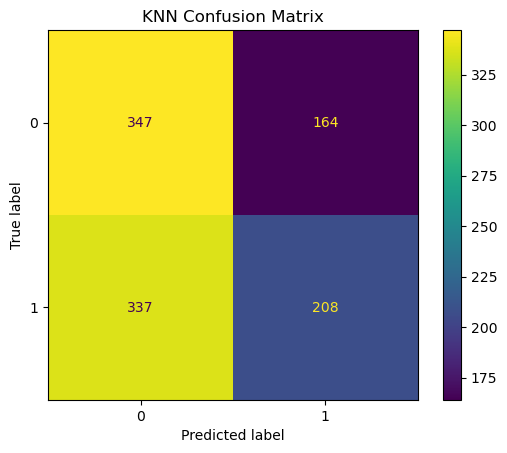

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#create a confusion matrix for our KNN predictions
conf_mat = confusion_matrix(test_labels, k_nbrs.predict(test_processed))
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot()
plt.title("KNN Confusion Matrix")
plt.savefig("first_KNN.png")
plt.show()

In [ ]:
#try grid search on n_neighbors
from sklearn.model_selection import GridSearchCV

#same pipeline
full_pipeline = Pipeline([
        ('process', preprocessing),
        ('kn', KNeighborsClassifier(n_neighbors = int(math.sqrt(len(train)))))
    ])

#we will search from 1 neighbor to 100 neighbors
param_grid = [
    {'kn__n_neighbors': range(1,100)}
]

#we will use a 10 fold cross validation with average accuracy being our outcome to measure
grid_search = GridSearchCV(full_pipeline, param_grid, cv = 10, scoring = 'accuracy')

grid_search.fit(train_raw, train_labels)

#create data frame and display
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016062,0.004134,0.049514,0.011780,1,{'kn__n_neighbors': 1},0.514218,0.488152,0.518957,0.516588,0.500000,0.545024,0.526066,0.530806,0.504739,0.462085,0.510664,0.022261,99
1,0.018185,0.006403,0.045198,0.004813,2,{'kn__n_neighbors': 2},0.530806,0.507109,0.509479,0.521327,0.549763,0.530806,0.535545,0.521327,0.533175,0.481043,0.522038,0.018142,97
2,0.016034,0.003345,0.045010,0.007066,3,{'kn__n_neighbors': 3},0.547393,0.507109,0.497630,0.507109,0.523697,0.523697,0.537915,0.540284,0.476303,0.504739,0.516588,0.020901,98
3,0.018039,0.004772,0.046117,0.007124,4,{'kn__n_neighbors': 4},0.549763,0.526066,0.488152,0.549763,0.542654,0.547393,0.552133,0.523697,0.488152,0.528436,0.529621,0.023005,96
4,0.021569,0.006862,0.044646,0.007099,5,{'kn__n_neighbors': 5},0.516588,0.511848,0.514218,0.537915,0.540284,0.568720,0.540284,0.535545,0.500000,0.530806,0.529621,0.018606,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.030536,0.008011,0.086479,0.009016,95,{'kn__n_neighbors': 95},0.530806,0.523697,0.533175,0.542654,0.556872,0.582938,0.559242,0.533175,0.580569,0.533175,0.547630,0.020148,6
95,0.030724,0.006600,0.080669,0.004073,96,{'kn__n_neighbors': 96},0.528436,0.511848,0.533175,0.542654,0.556872,0.578199,0.549763,0.537915,0.575829,0.547393,0.546209,0.019433,16
96,0.030979,0.003975,0.082897,0.006344,97,{'kn__n_neighbors': 97},0.523697,0.514218,0.540284,0.540284,0.552133,0.585308,0.561611,0.535545,0.590047,0.540284,0.548341,0.023295,2
97,0.033013,0.005179,0.094265,0.011341,98,{'kn__n_neighbors': 98},0.523697,0.514218,0.533175,0.526066,0.545024,0.585308,0.552133,0.535545,0.578199,0.528436,0.542180,0.022275,64


In [99]:
cv_res.mean_test_score.idxmax()

58

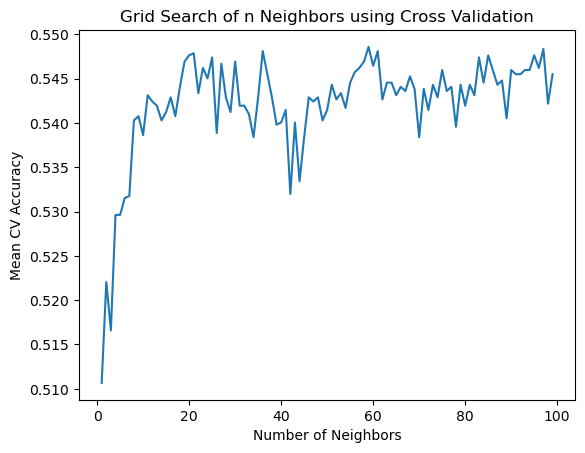

In [101]:
import matplotlib.pyplot as plt

#plot average accuracy across whole grid search
plt.plot(cv_res.param_kn__n_neighbors, cv_res.mean_test_score)
plt.xlabel("Number of Neighbors")
plt.ylabel("Mean CV Accuracy")
plt.title("Grid Search of n Neighbors using Cross Validation")
plt.savefig("KNN_grid.png")
plt.show()

In [100]:
#let's try out new best n value
k_nbrs = KNeighborsClassifier(n_neighbors = 59)
k_nbrs.fit(train_processed, train_labels)

test_labels = test['boom_bust']
test_raw = test[num + cat]


test_processed = preprocessing.fit_transform(test_raw)

accuracy_score(test_labels, k_nbrs.predict(test_processed))

0.5303030303030303

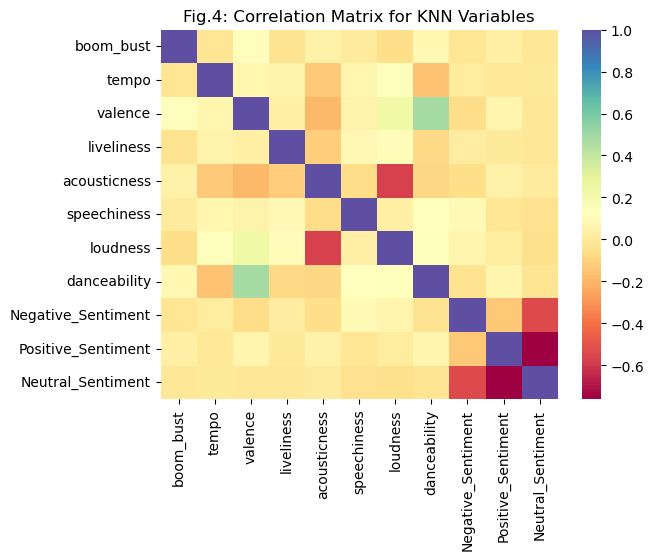

In [128]:
import seaborn as sns
#plot showing correlation between all of our variables in the dataset
sns.heatmap(clean_df[["boom_bust"] + num].corr(), cmap = "Spectral")
plt.title("Fig.4: Correlation Matrix for KNN Variables")
plt.savefig("corr_matrix.png", bbox_inches='tight')
plt.show()